In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

In [2]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = "cpu"
print(f"Using device = {device}")


Using device = cpu


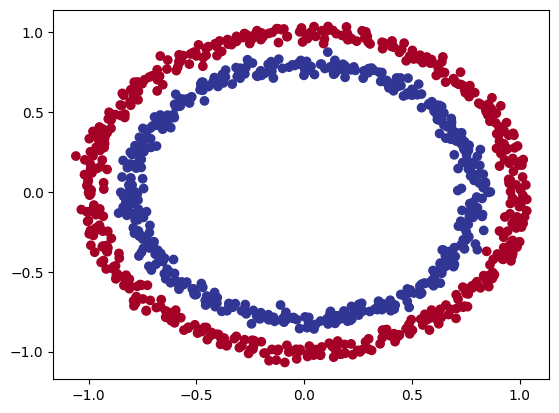

In [3]:
n_samples =1000
X ,y = make_circles(n_samples=n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [4]:
from sklearn.model_selection import train_test_split
print(f"Before {type(X), type(y)}")
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"Before {type(X), type(y)}")

Before (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)
Before (<class 'torch.Tensor'>, <class 'torch.Tensor'>)


In [5]:
X_train, X_test, y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)

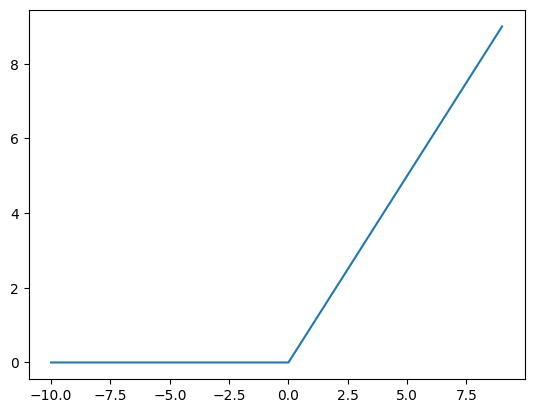

In [6]:
import numpy as np
def RELU(x):
    return 0 if x<=0 else x

x= range(-10,10)
y=[RELU(val) for val in x]
plt.plot(x,y);

In [7]:
class CircleModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


    

In [8]:
model_0 = CircleModel()
model_0.to(device)
next(model_0.parameters()).device

device(type='cpu')

In [9]:
model_0.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[ 0.1428, -0.6659],
                      [-0.4965, -0.3532],
                      [-0.3031, -0.5582],
                      [-0.2112, -0.0627],
                      [-0.3837, -0.0475],
                      [ 0.6872, -0.2463],
                      [-0.6540, -0.6452],
                      [ 0.4944, -0.6617],
                      [ 0.1384,  0.3461],
                      [-0.1262,  0.4426]])),
             ('layer_1.bias',
              tensor([ 0.2998,  0.6563,  0.0780,  0.2753,  0.4233, -0.6882,  0.4252, -0.6580,
                      -0.5709,  0.5882])),
             ('layer_2.weight',
              tensor([[ 0.1343,  0.0013,  0.1979, -0.1348,  0.1767,  0.0122,  0.1733, -0.0533,
                        0.0578,  0.1758],
                      [ 0.1618,  0.3063,  0.2520, -0.0409,  0.2940,  0.0118, -0.1946, -0.1807,
                       -0.2553,  0.2262],
                      [-0.3109, -0.1660, -0.1189, -0.1336,  0.0579,  0.1

In [10]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)

In [11]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [12]:
epochs = 2000
torch.manual_seed(42)
trainLossList = []
testLossList = []
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ###Training
    model_0.train()

    #1. forward pass
    y_logits = model_0(X_train).squeeze()
    
    
    y_preds = torch.round(torch.sigmoid(y_logits))
    #2 compute training loss 
    loss  = loss_fn(y_logits,y_train)


    #3 zero grad the optimizer 
    optimizer.zero_grad()
    
    #4 loss backwared -> backpropagate
    loss.backward()

    #5 . Step the optimizer
    optimizer.step()

    acc= accuracy_fn(y_true=y_train, y_pred=y_preds)

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred= test_preds)

    if epoch%10 ==0:
        print(f"Epoch {epoch} | Train loss: {loss:.4f}| Train Acc:{acc}| Test Loss:{test_loss:.4f} | Test Acc : {test_acc}")

    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())


Epoch 0 | Train loss: 0.6944| Train Acc:50.0| Test Loss:0.6930 | Test Acc : 50.0
Epoch 10 | Train loss: 0.6923| Train Acc:50.24999999999999| Test Loss:0.6920 | Test Acc : 50.5
Epoch 20 | Train loss: 0.6914| Train Acc:60.75000000000001| Test Loss:0.6919 | Test Acc : 65.0
Epoch 30 | Train loss: 0.6910| Train Acc:62.74999999999999| Test Loss:0.6920 | Test Acc : 58.5
Epoch 40 | Train loss: 0.6907| Train Acc:62.74999999999999| Test Loss:0.6921 | Test Acc : 60.0
Epoch 50 | Train loss: 0.6904| Train Acc:61.12499999999999| Test Loss:0.6922 | Test Acc : 59.5
Epoch 60 | Train loss: 0.6901| Train Acc:57.875| Test Loss:0.6922 | Test Acc : 55.00000000000001
Epoch 70 | Train loss: 0.6899| Train Acc:55.125| Test Loss:0.6923 | Test Acc : 50.5
Epoch 80 | Train loss: 0.6896| Train Acc:52.125| Test Loss:0.6924 | Test Acc : 49.0
Epoch 90 | Train loss: 0.6894| Train Acc:51.37500000000001| Test Loss:0.6925 | Test Acc : 47.5
Epoch 100 | Train loss: 0.6891| Train Acc:51.5| Test Loss:0.6925 | Test Acc : 47.0
E

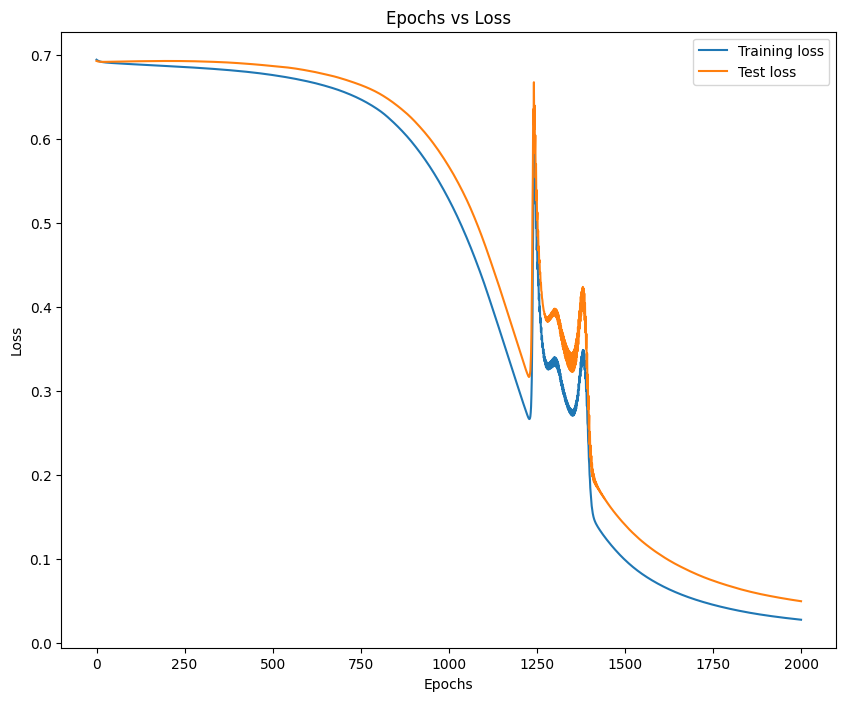

In [13]:
plt.figure(figsize=(10,8))
plt.plot(range(epochs),trainLossList,label="Training loss")
plt.plot(range(epochs),testLossList,label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()



In [14]:
model_0.eval()

CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)